In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from math import *
import trimesh
from mpl_toolkits.mplot3d import Axes3D


In [2]:
from treesim import * # este es el archivo con el modelo

In [3]:
points_tree = gen_simtree(Np=10000)

In [4]:
np.random.seed(42)

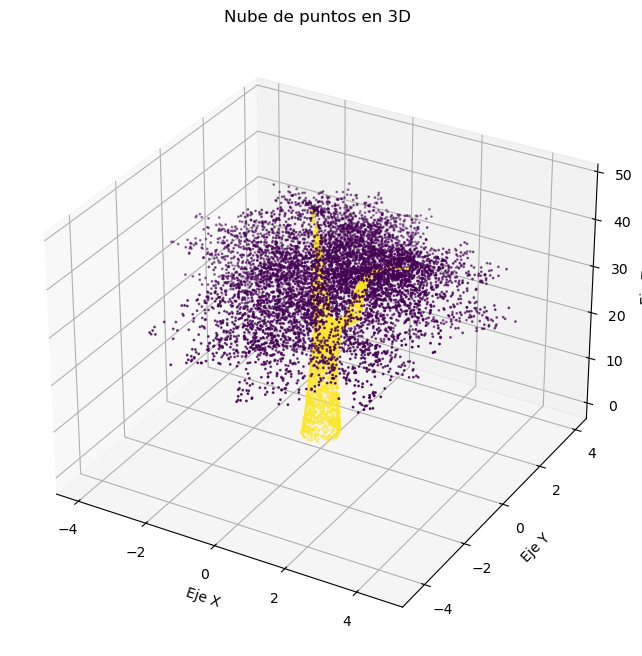

In [5]:
# Crear las coordenadas y los colores
x = points_tree[:, 0]
y = points_tree[:, 1]
z = points_tree[:, 2]
colors = points_tree[:, 3]

# Configurar la figura y los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis', s=1)



# Etiquetas y título
ax.set_title("Nube de puntos en 3D")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.set_zlabel("Eje Z")

# Mostrar la figura
plt.show()

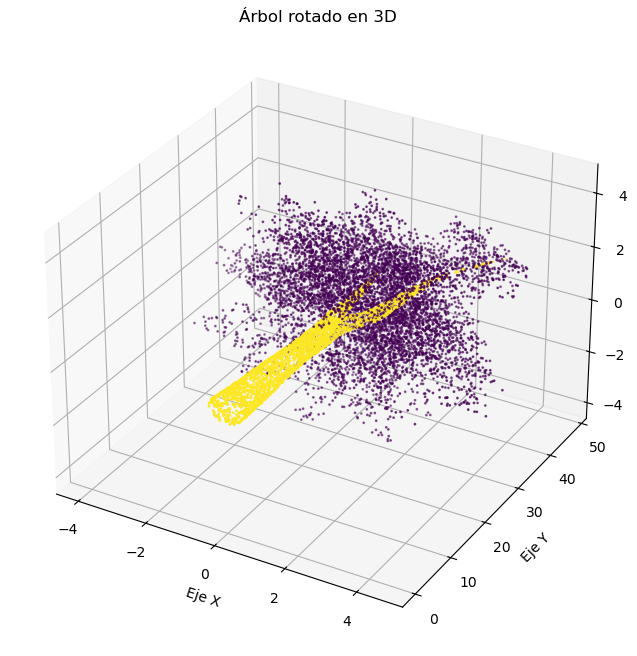

In [6]:


# Combinar en una sola matriz de coordenadas
coordinates = np.vstack((x, y, z)).T


theta = np.radians(270)  # Ángulo en radianes
rotation_matrix = np.array([
    [1, 0, 0],
    [0, np.cos(theta), -np.sin(theta)],
    [0, np.sin(theta), np.cos(theta)]
])

# Aplicar la rotación
rotated_coordinates = coordinates @ rotation_matrix.T

# Separar las nuevas coordenadas
x_rotated = rotated_coordinates[:, 0]
y_rotated = rotated_coordinates[:, 1]
z_rotated = rotated_coordinates[:, 2]

# Graficar los puntos rotados
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_rotated, y_rotated, z_rotated, c=points_tree[:, 3], cmap='viridis', s=1)


ax.set_title("Árbol rotado en 3D")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.set_zlabel("Eje Z")

plt.show()

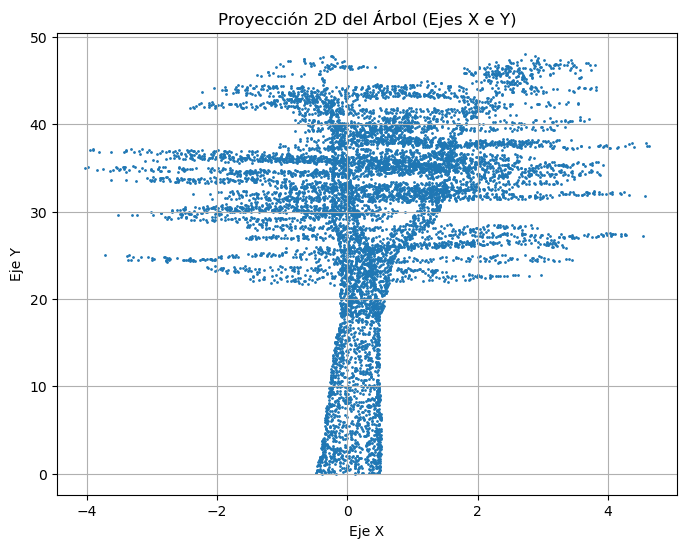

In [40]:
x_2d = x_rotated  # Coordenadas X rotadas
y_2d = y_rotated  # Coordenadas Y rotadas
#colors = points_tree[:, 3]  # Colores basados en la columna 3

# Graficar en 2D
plt.figure(figsize=(8, 6))
plt.scatter(x_2d, y_2d, s=1)
plt.title("Proyección 2D del Árbol (Ejes X e Y)")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid(True)
plt.show()

In [20]:
from PIL import Image
import numpy as np

image_path = 'basemodelado_bw.jpeg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)


threshold = 100  
target_points = np.column_stack(np.where(image_array < threshold))
target_points = np.hstack((target_points, np.zeros((target_points.shape[0], 1))))  

print("Total puntos objetivo:", target_points.shape[0])

Total puntos objetivo: 21191


In [30]:
matriz2d = target_points[:,:2]

In [32]:
def rotate_points_90_degrees(matrix):
    # Matriz de rotación para 90 grados en sentido antihorario
    theta = np.radians(270)  # Ángulo en radianes
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])
    
    # Transponer la matriz para que cada punto sea una columna
    matrix_transposed = matrix.T
    # Rotar los puntos
    rotated_matrix = np.dot(rotation_matrix, matrix_transposed)
    # Transponer de regreso para devolverla al formato original (21191, 2)
    return rotated_matrix.T

# Aplicar la rotación a la matriz proporcionada
rotated_matriz2d = rotate_points_90_degrees(matriz2d)

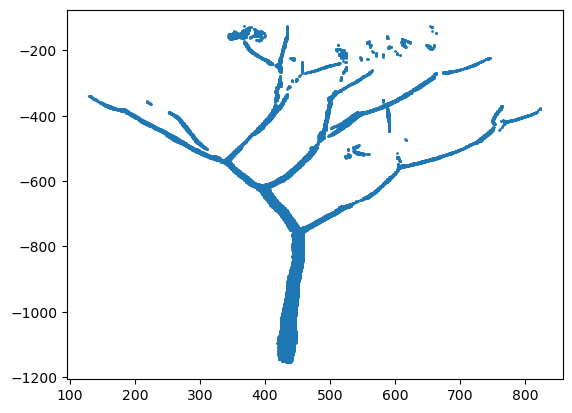

In [38]:
x = rotated_matriz2d[:,0]
y = rotated_matriz2d[:,1]

plt.scatter(x,y, s=1)

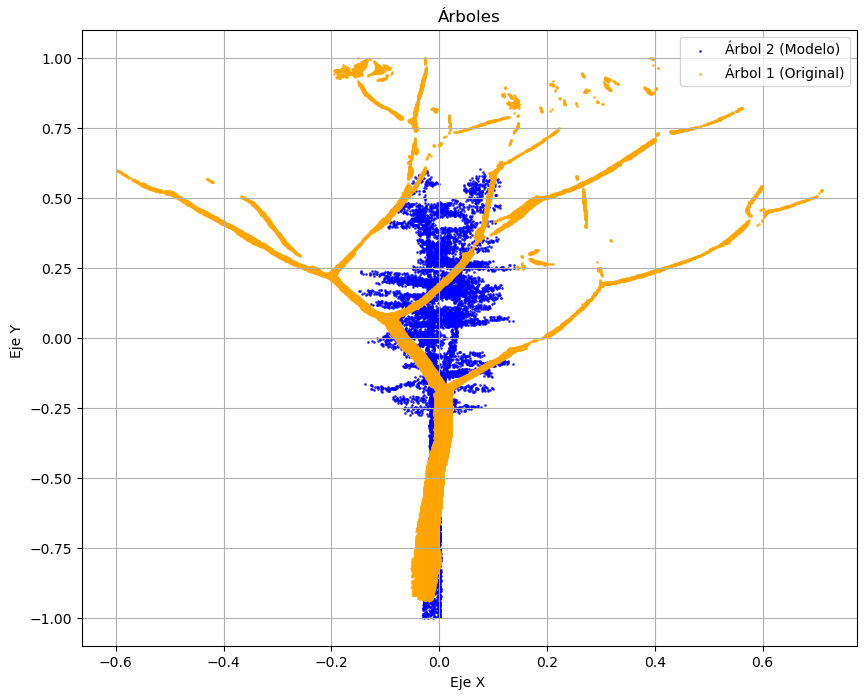

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Árbol 1 (original)
x1 = x_2d
y1 = y_2d

# Árbol 2 (rotado)
x2 = rotated_matriz2d[:, 0]
y2 = rotated_matriz2d[:, 1]

# Paso 1: Centrar ambos árboles en el origen (0, 0)
x1_centered = x1 - np.mean(x1)
y1_centered = y1 - np.mean(y1)

x2_centered = x2 - np.mean(x2)
y2_centered = y2 - np.mean(y2)

# Paso 2: Escalar ambos árboles manualmente al mismo rango si es necesario
scaling_factor_1 = max(np.max(np.abs(x1_centered)), np.max(np.abs(y1_centered)))
scaling_factor_2 = max(np.max(np.abs(x2_centered)), np.max(np.abs(y2_centered)))

x1_scaled = x1_centered / scaling_factor_1
y1_scaled = y1_centered / scaling_factor_1

x2_scaled = x2_centered / scaling_factor_2
y2_scaled = y2_centered / scaling_factor_2

# Graficar ambos árboles traslapados
plt.figure(figsize=(10, 8))

# Árbol 1 (original) en azul
plt.scatter(x1_scaled, y1_scaled, color='blue', label='Árbol 2 (Modelo)', s=1, alpha=0.7)

# Árbol 2 (rotado) en naranja
plt.scatter(x2_scaled, y2_scaled, color='orange', label='Árbol 1 (Original)', s=1, alpha=0.7)

# Configuración de la gráfica
plt.xlabel('Eje X ')
plt.ylabel('Eje Y ')
plt.title('Árboles')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


